# Implement a Feed-Forward Network

* write a function to create random weights
* write a function calculating the output of a single layer
* write a function calculating the sigmoid activation function
* combine the functions to a two-layer network

In [1]:
import numpy as np

In [2]:
def get_random_weights(n_neurons, n_features):
    """
    Sample randomized weights for multiple features and neurons from a normal distribution.
    """
    return np.random.normal(size=(n_neurons, n_features))

In [3]:
# write a function calculating the sigmoid activation function
def sigmoid(x):
    """applies the sigmoid function on a 2D array"""
    return 1 / (1 + np.exp(-x))

In [46]:
def calc_dense_layer(inputs, weights, activation_func):
    """
    takes two numpy arrays and an activation function
    returns the output of a single feed-forward layer
    """
    n_datapoints = inputs.shape[0]
    n_neurons = weights.shape[0]
    
    input_b = add_bias(inputs)
    weighted_sum = np.dot(input_b, weights)
    output = activation_func(weighted_sum)
    return output

In [47]:
def add_bias(X):
    """add a bias column to an array"""
    b = np.ones((X.shape[0], 1))  # number of data points --> single column
    return np.hstack([X, b])  # stack (50, 2) with (50, 1)

In [100]:
def feed_forward(X, weights_hidden, weights_output):
    hidden_output = calc_dense_layer(X, weights_hidden, sigmoid)        # --> 50,2
    y_hat = calc_dense_layer(hidden_output, weights_output, sigmoid)    # --> 50,1
    return y_hat, hidden_output

In [75]:
def calc_logloss(ytrue, yhat):
    yhat = yhat.flatten()
    assert ytrue.shape == (50,)
    assert yhat.shape == (50,)
    loss = -(ytrue * np.log(yhat) + (1 - ytrue)* np.log(1 - yhat))
    return loss

In [76]:
calc_logloss(ytrue, yhat)

array([0.56063665, 0.54861472, 0.5581529 , 0.54998545, 0.89329427,
       0.88262004, 0.85334842, 0.55358351, 0.55772811, 0.8737476 ,
       0.88828322, 0.88036962, 0.87423447, 0.54702845, 0.87605004,
       0.85457608, 0.54052171, 0.54958831, 0.8427177 , 0.54945836,
       0.89776531, 0.54578916, 0.53356414, 0.54055797, 0.55412658,
       0.8859831 , 0.86524642, 0.86538723, 0.55799577, 0.54338537,
       0.88183041, 0.87843234, 0.56329473, 0.54601345, 0.89323402,
       0.89110708, 0.88371704, 0.868764  , 0.88144267, 0.52993538,
       0.54845342, 0.53537506, 0.89496489, 0.88667493, 0.8456286 ,
       0.54514562, 0.52640559, 0.88011232, 0.55683414, 0.54843704])

In [156]:
def backprop(X, ytrue, wh, wo):
    """
    (A) error=(y^−ytrue)×loss
    (B) ∇y=act′(Ho⋅ωo)×error
    (C) Δωo=−(∇y⋅Ho)×LR
    (D) ∇H=act′(X⋅ωh)×(∇y⋅ωo)
    (E) Δωh=−(∇H⋅X)×LR
    """
    yhat, hidden_out = feed_forward(X, wh, wo)
    yhat = yhat.flatten()
    assert yhat.shape == (50,)
    
    loss = calc_logloss(ytrue, yhat)  # (50,)
    assert loss.shape == (50,)
    
    error = (yhat - ytrue) * loss  # (A)
    
    deriv_sigmoid = yhat * (1 - yhat)
    gradient = deriv_sigmoid * error # (B)
    
    hidden_out = add_bias(hidden_out)
    delta_wo = -np.dot(gradient, hidden_out)  # (50,) * (50,3) -> (3,)
    delta_wo = delta_wo.reshape(3,1) # (C)
    
    #------------------------------------------
    #deriv_sigmoid = hidden_out * (1 - hidden_out)
    #deriv_sigmoid = deriv_sigmoid[:,:2]  # remove bias  -> (50, 2)
    
    #gradient = np.dot(gw, deriv_sigmoid) # (D)
    #gradient = add_bias(gradient)
     
    #X = add_bias(X)
    #delta_wh = -np.dot(gradient, X.T)
    #delta_wH = delta_wh.reshape(3,2) # (E)
    #------------------------------------------
    return 0.0, delta_wo

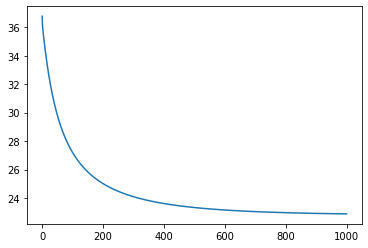

In [157]:
np.random.seed(42)

w1 = get_random_weights(3, 2)     # 2 neurons, 2+1 inputs
w2 = get_random_weights(3, 1)     # 1 neuron, 2+1 inputs
ytrue = y
LR = 0.1

history = []
for i in range(1000):
    delta_whidden, delta_woutput = backprop(X, ytrue, w1, w2)
    w1 += delta_whidden * LR
    w2 += delta_woutput * LR
    yhat, _ = feed_forward(X, w1, w2)
    loss = calc_logloss(ytrue, yhat).sum()  # total loss of the model
    history.append(loss)
    #print(loss)

plt.plot(history)

In [153]:

yhat = feed_forward(X, w1, w2)

In [14]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

In [23]:
X, y = make_moons(n_samples=50, noise=0.2)
X.shape, y.shape

((50, 2), (50,))

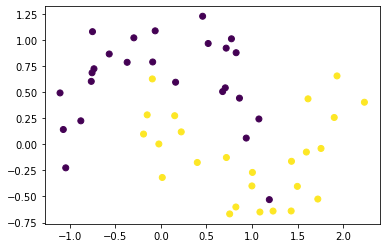

In [24]:
plt.scatter(X[:,0], X[:,1], c=y)

## Test Code

In [5]:
assert get_random_weights(3, 2).shape == (3, 2)

In [7]:
a = np.array([[1.0, 0.0], [0.0, 1.0], [0.5, 0.5]])
w = get_random_weights(3, 2)
assert type(calc_dense_layer(a, w, np.sum)) == np.float64

(3, 1) (3, 2) 3


In [10]:
a = np.array([[-99.9, +99.9, 0.0, -1.0, 1.0]])
expected = np.array([[0.0, 1.0, 0.5, 0.3, 0.7]])
result = sigmoid(a).round(1)
assert np.all(expected == result)

In [11]:
X = np.array([(0, 0), (1, 0), (0, 1), (1, 1)], np.float64)
y = np.array([0, 0, 0, 1], np.float32)

In [12]:
w1 = get_random_weights(3, 1)
out1 = calc_dense_layer(X, w1, sigmoid)
out1

(4, 1) (4, 2) 3


array([[0.719189  ],
       [0.96902183],
       [0.35261076],
       [0.86932219]])

In [94]:
w2 = get_random_weights(2, 1)
out2 = calc_dense_layer(out1, w2, sigmoid)
out2

(4, 1) (4, 1) 2


array([[0.71588215],
       [0.78352761],
       [0.74098493],
       [0.79113115]])